# Exercise 1

- Go to this website: (https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192)
- Use BeautifulSoup, to select the name, price, amount of stars (review related) and amount in stock.
- Save the data, to be used for later.



In [4]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import re

In [5]:
def getValue(test, tag, className, val = None):
    try:
        if(val): return test.find(tag, {'class': className})[val]
        else: return test.find(tag, {'class': className})
    except:
        return None
    

In [6]:
url = 'https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192'
html = requests.get(url)

def getDataFrame():
    soup = BeautifulSoup(html.text, 'html.parser')

    test = soup.find_all("div", {"class": "product-list-item"})

    vals = []
    for t in range(len(test)):
        temp_arr = []
        temp_arr.append(getValue(test[t], 'div', 'text-content').text.strip())
        temp_arr.append(int(''.join(c for c in getValue(test[t], 'span', 'product-price-now').text if c not in '.,-')))
        temp_arr.append(getValue(test[t], 'span', 'rating-stars', val = 'title'))
        temp_arr.append(getValue(test[t], 'span', 'stockstatus-stock-details', val = 'title'))
        vals.append(temp_arr)
#     vals[t].append(getValue(test[t], 'span', 'product-price-now').text.strip())
#     vals[t].append()
#     vals[t].append(getValue(test[t], 'span', 'rating-stars', val = 'title'))
#     vals[t].append(getValue(test[t], 'span', 'stockstatus-stock-details', val = 'title'))
    return pd.DataFrame(vals, columns=['Name','Price','Stars','Lager'])
 

    

# Exercise 1

- Using Regular Expressions and the data from exercise 1, find all headset which is in stock.
- Create a list of tuples with the data from subtask 1.

    

In [7]:
# test = re.compile(r'^/d')
df = getDataFrame()
test = []
for lager in range(len(df['Lager'])):
    try:
        test.append(int(df['Lager'][lager].split(' ')[0].replace('+', '')))
    except: test.append(0)

df['Lager'] = pd.Series(test)
df

,Name,Price,Stars,Lager
0,"Razer Nari Ultimate Gaming Headset\ntrådlös, u...",799,2.9 af 5 Stjerner,100
1,Steelseries Arctis 7 Trådløs 2019 Sort\noptræk...,999,3.8 af 5 Stjerner,81
2,HyperX Cloud Flight S Trådløs Gaming Headset\n...,1289,3.3 af 5 Stjerner,100
3,"HyperX Cloud II Trådløs gaming headset\n2,4 GH...",1299,4.0 af 5 Stjerner,57
4,Steelseries Arctis Pro Headset + GameDAC\n3.5m...,2099,3.5 af 5 Stjerner,100
...,...,...,...,...
187,Turtle Beach Atlas Elite Gaming Headset\n3.5mm...,799,3.6 af 5 Stjerner,22
188,Razer Kraken BT Kitty Edition gaming headset Q...,899,None,0
189,Razer Kraken Kitty Edt Gaming Headset Sort\nus...,1399,5.0 af 5 Stjerner,0
190,ASTRO MixAmp Pro TR Gen.4 PS4 lydforstærker\nU...,1099,2.0 af 5 Stjerner,2


# Exercise 3
- Use the data from Exercise 2, to make a sorted bar chart of the headsets, where x-axis is names, and y-axis is price.

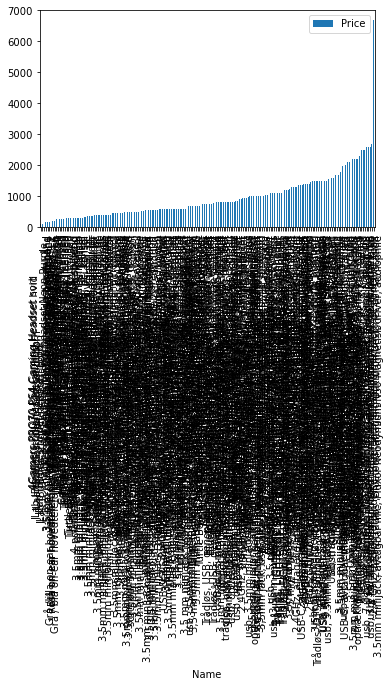

In [8]:
df = df.sort_values(by = ['Price'])

df.plot.bar(x='Name', y='Price')


## Powerpuff Pigerne & Professor Utonium
# Exercise 1

- Go to this website: https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop
- Use BeautifulSoup, to select the name and price for the laptops (hint: look for "product-list-container" to begin with).
- Save the data, to be used for later.


In [18]:
url = 'https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop'
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')

In [40]:
products_divs = soup.find_all("div", {"class": "col-infos"})

computers = {}
for product in products_divs:
    price = int(''.join(c for c in product.find('div', {'class': 'product-price'}).find(text=True, recursive=False).strip() if c in '1234567890'))
    name = product.find('span', {'class': 'table-cell'}).text
    computers[name] = price
print(computers)
#     print(price)
# soup.find_all('div', {'class': 'mini-product-content-wrapper'})


{'Asus TUF Gaming A15 FX506 15,6" gaming computer (sort)': 9999, 'MSI GF63 Thin 9SCXR-1252NE 15,6" bærbar gaming computer (sort)': 4999, 'HP Pavilion 15-ec1816no 15,6" bærbar gaming computer': 7499, 'Asus ROG Strix G153QR 15,6" bærbar gaming computer (grå)': 15999, 'MSI GF63 Thin 9SCSR-1255NE 15,6" bærbar gaming computer (sort)': 6999, 'HP Pavilion 15-ec1815no 15,6" bærbar gaming computer': 4999, 'MSI GF75 Thin 9SCXR-601NE 17,3" bærbar gaming computer (sort)': 7499, 'MSI GF65 Thin 15,6" bærbar gaming computer i5/16/1024/1660TI/15-144': 8999, 'HP Pavilion 15-ec1818no 15,6" bærbar computer': 6999, 'Asus TUF Gaming A15 FX506 15,6" bærbar gaming computer': 8499, 'Asus TUF Gaming A17 FA706QM 17,3" bærbar gaming computer (grå)': 11999, 'HP Pavilion 17-cd1811no 17,3" bærbar gaming computer': 5999, 'Asus ZenBook Pro 15 UX535 15,6" bærbar computer i7/16/512/1650Ti/FHD': 13499, 'Asus TUF Gaming A17 FX706II-H7048T 17,3" bærbar gaming computer (grå)': 7999, 'Asus TUF Gaming A15 FA506 15,6" bærbar 